# Preparation du dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from os import listdir
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
from glob import glob
from PIL import Image
import gensim
import os
import transformers
#pd.set_option('display.max_colwidth', None)
pd.options.display.max_colwidth = 100
from sklearn.preprocessing import LabelEncoder

/Users/juliesaubot/anaconda3/envs/tensorflow_env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import tensorflow as tf
import tensorflow.keras

from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.models import Model, Sequential
#from tensorflow.keras.layers import Input, GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout
#from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import tensorflow_hub as hub

os.environ["TF_KERAS"]='1'
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
# librairie de base pour le traitement du langage naturel NLP
import nltk, string
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, words
# pour faire des representations graphiques :
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import manifold, decomposition
from sklearn import cluster, metrics
import time
from matplotlib.image import imread
import cv2
import time

In [5]:
from PIL import Image, ImageFilter

### Exploratory Data analysis

In [6]:
#on importe le csv
df = pd.read_csv(filepath_or_buffer ='Flipkart/flipkart_com-ecommerce_sample_1050.csv',on_bad_lines='skip')


In [7]:
df.shape

(1050, 15)

In [8]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [9]:
df.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                                                                           product_url  \
0  http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdg...   
1           http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH   
2  http://www.flipkart.com/eurospa-cotton-terry-face-towel-set/p/itmeg6shbrpubhca?pid=BTWEG6SHXTDB2A2Y   
3  http://www.flipkart.com/santosh-royal-fashion-cotton-printed-king-sized-double-bedsheet/p/itmejt...   
4  http://www.flipkart.com/jaipur-print-cotton-floral-king-sized-double-bedsheet/p/itmejthnwahrnt7v...   

                                                      product_name  \
0       Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                       Sathiyas Cotton Bath Towel   
2                              Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4            Jaipur Print Cotton Floral King sized Double Bedsheet   

                                                                                 product_category_tree  \
0  ["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstrac...   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cot...   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotto...   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL ...   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Flo...   

                pid  retail_price  discounted_price  \
0  CRNEG7BKMFFYHQ8Z        1899.0             899.0   
1  BTWEGFZHGBXPHZUH         600.0             449.0   
2  BTWEG6SHXTDB2A2Y           NaN               NaN   
3  BDSEJT9UQWHDUBH4        2699.0            1299.0   
4  BDSEJTHNGWVGWWQU        2599.0             698.0   

                                  image  is_FK_Advantage_product  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg                    False   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg                    False   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg                    False   
3  d4684dcdc759dd9cdf41504698d737d8.jpg                    False   
4  6325b6870c54cd47be6ebfbffa620ec7.jpg                    False   

                                                                                           description  \
0  Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegan...   
1  Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Featur...   
2  Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa ...   
3  Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet P...   
4  Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print C...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                                                                                product_specifications  
0  {"product_specification"=>[{"k

In [10]:
df.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

<Axes: >

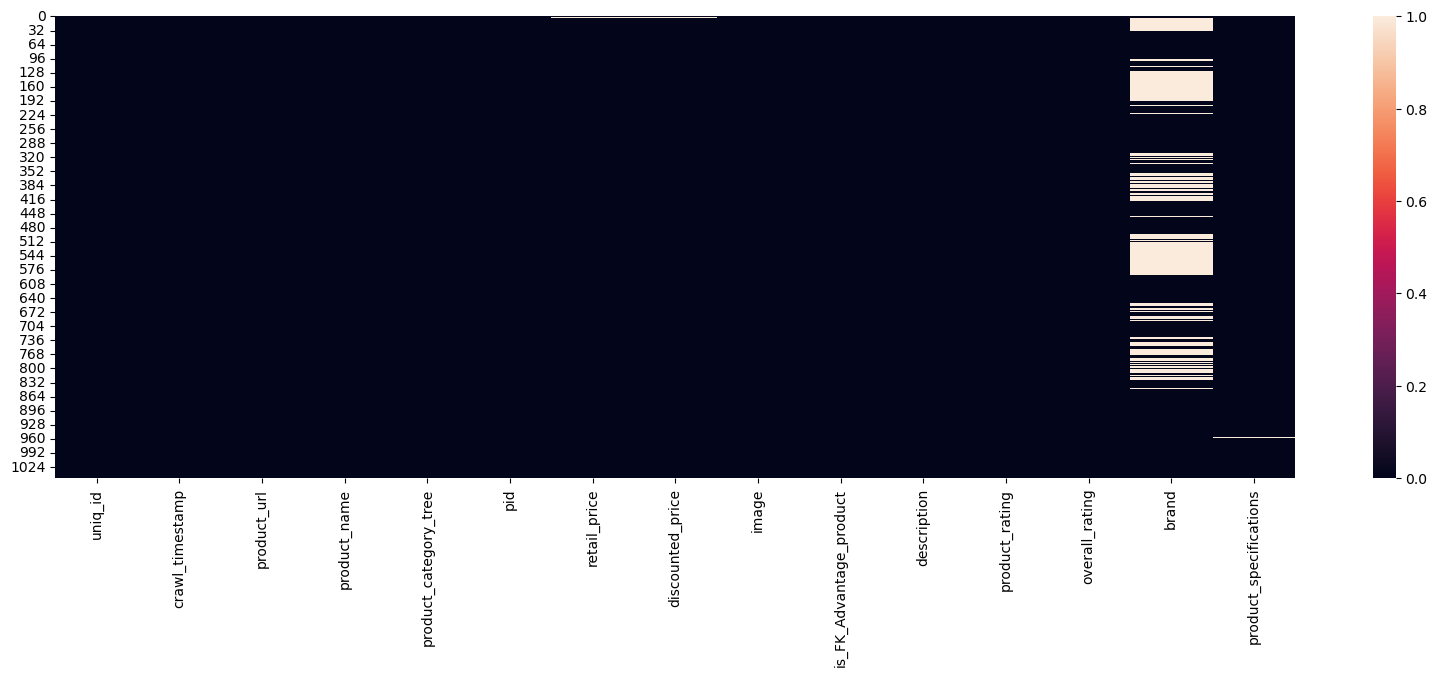

In [11]:
fig,ax= plt.subplots(1,1,figsize=(20,6))
sns.heatmap(df.isna())

In [12]:
#on regarde si il y a des doublons
df.duplicated().sum()

0

### Data inspection

In [13]:
df.describe(include=np.number)

retail_price  discounted_price
count    1049.000000       1049.000000
mean     2186.197331       1584.527169
std      7639.229411       7475.099680
min        35.000000         35.000000
25%       555.000000        340.000000
50%       999.000000        600.000000
75%      1999.000000       1199.000000
max    201000.000000     201000.000000

In [14]:
df.describe(include = object)

uniq_id            crawl_timestamp  \
count                               1050                       1050   
unique                              1050                        149   
top     55b85ea15a1536d46b7190ad6fff8ce7  2015-12-01 12:40:44 +0000   
freq                                   1                        150   

                                                                                                product_url  \
count                                                                                                  1050   
unique                                                                                                 1050   
top     http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdg...   
freq                                                                                                      1   

                                                      product_name  \
count                                                         1050   
unique                                                        1050   
top     Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
freq                                                             1   

                                                product_category_tree  \
count                                                            1050   
unique                                                            642   
top     ["Home Furnishing >> Bed Linen >> Blankets, Quilts & Dohars"]   
freq                                                               56   

                     pid                                 image  \
count               1050                                  1050   
unique              1050                                  1050   
top     CRNEG7BKMFFYHQ8Z  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
freq                   1                                     1   

                                                                                                description  \
count                                                                                                  1050   
unique                                                                                                 1050   
top     Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegan...   
freq                                                                                                      1   

             product_rating       overall_rating         brand  \
count                  1050                 1050           712   
unique                   27                   27           490   
top     No rating available  No rating available  PRINT SHAPES   
freq                    889                  889            11   

                                                                                     product_specifications  
count                                                                                                  1049  
unique                                                                                                  984  
top     {"product_specification"=>[{"key"=>"Type", "value"=>"Mug"}, {"key"=>"Mug Capacity", "value"=>"5....  
freq                                                                                                     22

# Etape 1 : étude de faisabilité

## Faisabilité de classification - Texte

### Pretraitement de texte : nettoyage (ponctuation, stopwords..), lemmatization

In [15]:
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/juliesaubot/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juliesaubot/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/juliesaubot/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/juliesaubot/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/juliesaubot/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
# charger seaborn
sns.set()

In [17]:
#on prends en exemple une des description du dataframe
sentence_ex = df['description'][2]
sentence_ex

'Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft texture that takes care of your skin and gives you that enriched feeling you deserve. Eurospa has been exporting its bath towels to lot of renowned brands for last 10 years and is famous for its fine prints, absorbency, softness and durability. NOTE: Our product is 100% cotton, so it is susceptible to shrinkage. Product color may vary from the picture. Size may vary by ±3% WASH CARE: Wash in cold Water, Do not Iron, Do not Bleach, Flat dry, Wash before first use. SIZE- FACE TOWEL - 23 cms X 23 cms.,Specifications of Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Bath Towel Features Material Cotton Terry Design SHUVAM General Brand Eurospa GSM 360 Type Face Towel Set Model N

In [18]:
#fonction permettant de tokenizer une phrase
#c'est a dire transformer les phrases en listes de tokens
def tokenize(sentence):
    tokenizer = RegexpTokenizer(r"\w+")
    tokenize_sentence = tokenizer.tokenize(sentence.lower())
    return tokenize_sentence

tokens = tokenize(sentence_ex)
tokens

['key',
 'features',
 'of',
 'eurospa',
 'cotton',
 'terry',
 'face',
 'towel',
 'set',
 'size',
 'small',
 'height',
 '9',
 'inch',
 'gsm',
 '360',
 'eurospa',
 'cotton',
 'terry',
 'face',
 'towel',
 'set',
 '20',
 'piece',
 'face',
 'towel',
 'set',
 'assorted',
 'price',
 'rs',
 '299',
 'eurospa',
 'brings',
 'to',
 'you',
 'an',
 'exclusively',
 'designed',
 '100',
 'soft',
 'cotton',
 'towels',
 'of',
 'export',
 'quality',
 'all',
 'our',
 'products',
 'have',
 'soft',
 'texture',
 'that',
 'takes',
 'care',
 'of',
 'your',
 'skin',
 'and',
 'gives',
 'you',
 'that',
 'enriched',
 'feeling',
 'you',
 'deserve',
 'eurospa',
 'has',
 'been',
 'exporting',
 'its',
 'bath',
 'towels',
 'to',
 'lot',
 'of',
 'renowned',
 'brands',
 'for',
 'last',
 '10',
 'years',
 'and',
 'is',
 'famous',
 'for',
 'its',
 'fine',
 'prints',
 'absorbency',
 'softness',
 'and',
 'durability',
 'note',
 'our',
 'product',
 'is',
 '100',
 'cotton',
 'so',
 'it',
 'is',
 'susceptible',
 'to',
 'shrinkage

In [19]:
#fonction pour nettoyer les champs de texte
def nettoyage(sentence):
    #enlever la ponctuation et les majuscules
    sentence_w_punct = "".join([i.lower() for i in sentence if i not in string.punctuation])
    
    #on transforme la phrase en une liste de tokens
    tokenizer = RegexpTokenizer(r"\w+")
    tokenize_sentence = tokenizer.tokenize(sentence_w_punct.lower())
    
    #enlever les stopwords : mots qui apparaissent frequemment (de, le, une) mais qui n'apportent pas de sens à la phrase
    stopwords = nltk.corpus.stopwords.words('english')
    words_w_stopwords = [i for i in tokenize_sentence if i not in stopwords] 
    
    return words_w_stopwords

tokens_cleaned = nettoyage(sentence_ex)
tokens_cleaned

['key',
 'features',
 'eurospa',
 'cotton',
 'terry',
 'face',
 'towel',
 'set',
 'size',
 'small',
 'height',
 '9',
 'inch',
 'gsm',
 '360eurospa',
 'cotton',
 'terry',
 'face',
 'towel',
 'set',
 '20',
 'piece',
 'face',
 'towel',
 'set',
 'assorted',
 'price',
 'rs',
 '299',
 'eurospa',
 'brings',
 'exclusively',
 'designed',
 '100',
 'soft',
 'cotton',
 'towels',
 'export',
 'quality',
 'products',
 'soft',
 'texture',
 'takes',
 'care',
 'skin',
 'gives',
 'enriched',
 'feeling',
 'deserve',
 'eurospa',
 'exporting',
 'bath',
 'towels',
 'lot',
 'renowned',
 'brands',
 'last',
 '10',
 'years',
 'famous',
 'fine',
 'prints',
 'absorbency',
 'softness',
 'durability',
 'note',
 'product',
 '100',
 'cotton',
 'susceptible',
 'shrinkage',
 'product',
 'color',
 'may',
 'vary',
 'picture',
 'size',
 'may',
 'vary',
 '3',
 'wash',
 'care',
 'wash',
 'cold',
 'water',
 'iron',
 'bleach',
 'flat',
 'dry',
 'wash',
 'first',
 'use',
 'size',
 'face',
 'towel',
 '23',
 'cms',
 'x',
 '23',
 

In [20]:
#fonction permettant de lemmatizer une phrase
#Le processus de lemmatisation consiste à représenter les mots sous leur forme canonique
def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    words_lemmatize = [lemmatizer.lemmatize(w) for w in tokens]
    return words_lemmatize

lemmatize(tokens_cleaned)

['key',
 'feature',
 'eurospa',
 'cotton',
 'terry',
 'face',
 'towel',
 'set',
 'size',
 'small',
 'height',
 '9',
 'inch',
 'gsm',
 '360eurospa',
 'cotton',
 'terry',
 'face',
 'towel',
 'set',
 '20',
 'piece',
 'face',
 'towel',
 'set',
 'assorted',
 'price',
 'r',
 '299',
 'eurospa',
 'brings',
 'exclusively',
 'designed',
 '100',
 'soft',
 'cotton',
 'towel',
 'export',
 'quality',
 'product',
 'soft',
 'texture',
 'take',
 'care',
 'skin',
 'give',
 'enriched',
 'feeling',
 'deserve',
 'eurospa',
 'exporting',
 'bath',
 'towel',
 'lot',
 'renowned',
 'brand',
 'last',
 '10',
 'year',
 'famous',
 'fine',
 'print',
 'absorbency',
 'softness',
 'durability',
 'note',
 'product',
 '100',
 'cotton',
 'susceptible',
 'shrinkage',
 'product',
 'color',
 'may',
 'vary',
 'picture',
 'size',
 'may',
 'vary',
 '3',
 'wash',
 'care',
 'wash',
 'cold',
 'water',
 'iron',
 'bleach',
 'flat',
 'dry',
 'wash',
 'first',
 'use',
 'size',
 'face',
 'towel',
 '23',
 'cm',
 'x',
 '23',
 'cmsspecifi

In [21]:
#fonction permettant de stemmatizer une phrase
# la racinisation(ou stemming en anglais) consiste à ne conserver que la racine des mots étudiés
def stemmer(tokens):
    ps = PorterStemmer()
    words_stemmer = [ps.stem(w) for w in tokens]
    return words_stemmer

stemmer(tokens_cleaned)

['key',
 'featur',
 'eurospa',
 'cotton',
 'terri',
 'face',
 'towel',
 'set',
 'size',
 'small',
 'height',
 '9',
 'inch',
 'gsm',
 '360eurospa',
 'cotton',
 'terri',
 'face',
 'towel',
 'set',
 '20',
 'piec',
 'face',
 'towel',
 'set',
 'assort',
 'price',
 'rs',
 '299',
 'eurospa',
 'bring',
 'exclus',
 'design',
 '100',
 'soft',
 'cotton',
 'towel',
 'export',
 'qualiti',
 'product',
 'soft',
 'textur',
 'take',
 'care',
 'skin',
 'give',
 'enrich',
 'feel',
 'deserv',
 'eurospa',
 'export',
 'bath',
 'towel',
 'lot',
 'renown',
 'brand',
 'last',
 '10',
 'year',
 'famou',
 'fine',
 'print',
 'absorb',
 'soft',
 'durabl',
 'note',
 'product',
 '100',
 'cotton',
 'suscept',
 'shrinkag',
 'product',
 'color',
 'may',
 'vari',
 'pictur',
 'size',
 'may',
 'vari',
 '3',
 'wash',
 'care',
 'wash',
 'cold',
 'water',
 'iron',
 'bleach',
 'flat',
 'dri',
 'wash',
 'first',
 'use',
 'size',
 'face',
 'towel',
 '23',
 'cm',
 'x',
 '23',
 'cmsspecif',
 'eurospa',
 'cotton',
 'terri',
 'face'

### Fonction globale pour l'appliquer au dataframe 

In [22]:
# fonction de préparation du texte pour le bag of words (Countvectorizer, Tf_idf) et le Word2Vec
def process_text(listofSentence):

    preprocess_list = []
    for sentence in listofSentence :
        #enlever la ponctuation et les majuscules
        sentence_w_punct = "".join([i.lower() for i in sentence if i not in string.punctuation])
        
        #enlever les chiffres
        sentence_w_num = ''.join(i for i in sentence_w_punct if not i.isdigit())
        
        #transformer les phrases en listes de tokens
        tokenizer = RegexpTokenizer(r"\w+")
        tokenize_sentence = tokenizer.tokenize(sentence_w_num)
        #tokenize_sentence = nltk.tokenize.word_tokenize(sentence_w_num)
        
        #enlever les stopwords : mots qui apparaissent frequemment (de, le, une) mais qui n'apportent pas de sens à la phrase
        stopwords = nltk.corpus.stopwords.words('english')
        words_w_stopwords = [i for i in tokenize_sentence if i not in stopwords]
        
        #lemmatizer : conserver la racine des mots 
        lemmatizer = WordNetLemmatizer()
        words_lemmatize = [lemmatizer.lemmatize(w) for w in words_w_stopwords]
        
        #nettoyer la phrase finale
        words = set(nltk.corpus.words.words())
        sentence_clean = ' '.join(w for w in words_lemmatize if w.lower() in words or not w.isalpha())
        
        # reformer les phrases avec les mots restants
        preprocess_list.append(sentence_clean)

    return preprocess_list

#fonction pour la preparation de la description pour le deep learning (USE et BERT)
#on ne lemmatize pas les données et on enleve pas les stopwords

def process_text_dl(listofSentence):
    
    preprocess_list = []
    for sentence in listofSentence :
        #enlever la ponctuation et mettre en majuscule
        sentence_w_punct = "".join([i.lower() for i in sentence if i not in string.punctuation])
        
        #enlever les chiffres
        sentence_w_num = ''.join(i for i in sentence_w_punct if not i.isdigit())
        
        #transformer les phrases en listes de tokens
        tokenizer = RegexpTokenizer(r"\w+")
        tokenize_sentence = tokenizer.tokenize(sentence_w_num)
        
        #nettoyer la phrase finale
        words = set(nltk.corpus.words.words())
        sentence_clean = ' '.join(w for w in tokenize_sentence if w.lower() in words or not w.isalpha())
        
        # reformer les phrases avec les mots restants
        preprocess_list.append(sentence_clean)

    return preprocess_list

In [23]:
#on affiche un exemple
print('Phrase de base : '+df['description'][2])
print('\n')
print('Phrase nettoyée : '+process_text(df['description'])[2])

Phrase de base : Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft texture that takes care of your skin and gives you that enriched feeling you deserve. Eurospa has been exporting its bath towels to lot of renowned brands for last 10 years and is famous for its fine prints, absorbency, softness and durability. NOTE: Our product is 100% cotton, so it is susceptible to shrinkage. Product color may vary from the picture. Size may vary by ±3% WASH CARE: Wash in cold Water, Do not Iron, Do not Bleach, Flat dry, Wash before first use. SIZE- FACE TOWEL - 23 cms X 23 cms.,Specifications of Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Bath Towel Features Material Cotton Terry Design SHUVAM General Brand Eurospa GSM 360 Type Face T

In [24]:
# On crée des nouvelles features nettoyés pour le bag of words
df['description cleaned'] = process_text(df['description'])
df['product name cleaned'] = process_text(df['product_name'])

In [25]:
#on affiche un exemple
print('Phrase de base : '+df['description'][2])
print('\n')
print('Phrase nettoyée : '+process_text_dl(df['description'])[2])

Phrase de base : Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft texture that takes care of your skin and gives you that enriched feeling you deserve. Eurospa has been exporting its bath towels to lot of renowned brands for last 10 years and is famous for its fine prints, absorbency, softness and durability. NOTE: Our product is 100% cotton, so it is susceptible to shrinkage. Product color may vary from the picture. Size may vary by ±3% WASH CARE: Wash in cold Water, Do not Iron, Do not Bleach, Flat dry, Wash before first use. SIZE- FACE TOWEL - 23 cms X 23 cms.,Specifications of Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Bath Towel Features Material Cotton Terry Design SHUVAM General Brand Eurospa GSM 360 Type Face T

In [26]:
# On crée des nouvelles features nettoyées pour le Deep Learning (Deep et BERT)
df['description cleaned DL'] = process_text_dl(df['description'])
df['product name cleaned DL'] = process_text_dl(df['product_name'])

## Realisation d'un bag of words (countVectorizer, Tf-idf) pour créer des features pour chaque produit

Le CountVectorizer est utilisé pour transfomer un texte donné en un vecteur basé sur la frequence (count) de chaque mot present dans le texte entier. Le nombre d'occurrence de chaque mot est donc compté dans le texte.

La métrique tf-idf (Term-Frequency - Inverse Document Frequency) utilise comme indicateur de similarité l'inverse document frequency qui est l'inverse de la proportion de document.
Il ne considere pas le poids d'un mot dans un document comme sa fréquence d'apparition uniquement, mais pondère cette fréquence par un indicateur si ce mot est commun ou rare dans tous les documents. Il va donc réduire l'importance des termes qui apparaissent dans tous les documents.

In [27]:
#test sur une phrase 
#on affiche un exemple
print('Phrase de base : '+df['description'][5])
print('\n')
print('Phrase nettoyée : '+df['description cleaned'][5])

Phrase de base : Maserati Time R8851116001 Analog Watch  - For Boys - Buy Maserati Time R8851116001 Analog Watch  - For Boys  R8851116001 Online at Rs.24400 in India Only at Flipkart.com. - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!


Phrase nettoyée : time r watch boy buy time r watch boy r r great discount genuine product day replacement guarantee free shipping cash delivery


In [28]:
# création du bag of words (CountVectorizer et Tf-idf)
cvect_1 = CountVectorizer(max_df=0.95, #la proportion max de l'ensemble du corpus dans lesquels un mot doit apparaître pour être inclus dans les calculs
                          min_df=1) #la proportion min de l'ensemble du corpus dans lesquels un mot doit apparaître pour être inclus dans les calculs

tf_1 = TfidfVectorizer(max_df=0.95, 
                       min_df=1)

cv_fit_1 = cvect_1.fit(df['description cleaned'])
tf_fit_1 = tf_1.fit(df['description cleaned'])

cv_transform_1 = cvect_1.transform(df['description cleaned'])
tf_transform_1 = tf_1.transform(df['description cleaned'])

cvect_1.get_feature_names_out()

print(cv_transform_1[5])
print(tf_transform_1[5])

  (0, 318)	2
  (0, 372)	1
  (0, 422)	1
  (0, 713)	1
  (0, 741)	1
  (0, 790)	1
  (0, 1122)	1
  (0, 1178)	1
  (0, 1234)	1
  (0, 1245)	1
  (0, 2071)	1
  (0, 2218)	1
  (0, 2418)	1
  (0, 2778)	2
  (0, 2969)	2
  (0, 2969)	0.40784090333246953
  (0, 2778)	0.6187882732301581
  (0, 2418)	0.11315974209509995
  (0, 2218)	0.12310392113367613
  (0, 2071)	0.10188641182268363
  (0, 1245)	0.12586522196066494
  (0, 1234)	0.19826193195242434
  (0, 1178)	0.11315974209509995
  (0, 1122)	0.10966486318525379
  (0, 790)	0.21311455874837962
  (0, 741)	0.11291301835898153
  (0, 713)	0.11976514590223106
  (0, 422)	0.11315974209509995
  (0, 372)	0.11169230991269113
  (0, 318)	0.48441079195853515


On remarque qu'il y a 2 fois le mot "boy" dans la phrase 5.

Le mot "boy" corresponds au chiffre 318 donc on voit bien l'occurence 2 

In [29]:
#on a 1050 phrases avec 3066 mots uniques
cv_transform_1.shape

(1050, 3066)

In [30]:
#dictionnaires des mots uniques et de leur positions dans le vecteur
cvect_1.vocabulary_

{'key': 1469,
 'feature': 1022,
 'elegance': 886,
 'polyester': 2001,
 'multicolor': 1746,
 'abstract': 11,
 'eyelet': 993,
 'door': 817,
 'curtain': 684,
 'floral': 1084,
 'height': 1286,
 'pack': 1873,
 'price': 2051,
 'look': 1583,
 'made': 1616,
 'high': 1297,
 'quality': 2114,
 'style': 2637,
 'stitch': 2599,
 'metal': 1684,
 'make': 1626,
 'room': 2271,
 'environment': 926,
 'romantic': 2269,
 'ant': 107,
 'wrinkle': 3042,
 'anti': 110,
 'shrinkage': 2433,
 'elegant': 887,
 'home': 1312,
 'bright': 333,
 'modernistic': 1714,
 'appeal': 122,
 'design': 754,
 'attention': 169,
 'sure': 2675,
 'steal': 2587,
 'heart': 1281,
 'contemporary': 602,
 'valance': 2890,
 'slide': 2480,
 'smoothly': 2498,
 'draw': 824,
 'apart': 119,
 'first': 1060,
 'thing': 2763,
 'morning': 1729,
 'welcome': 2985,
 'sun': 2658,
 'ray': 2151,
 'want': 2956,
 'wish': 3016,
 'good': 1214,
 'whole': 2998,
 'world': 3032,
 'close': 511,
 'evening': 944,
 'create': 657,
 'special': 2545,
 'moment': 1719,
 'joy

In [31]:
cvect_1.get_feature_names_out()

array(['aa', 'ability', 'able', ..., 'zipper', 'zone', 'zoom'],
      dtype=object)

In [32]:
# création du bag of words (CountVectorizer et Tf-idf)

cvect_2 = CountVectorizer(max_df=0.95, min_df=1)
tf_2 = TfidfVectorizer(max_df=0.95, min_df=1)

col = df['description cleaned'] + df['product name cleaned']
cv_fit_transform_2 = cvect_2.fit_transform(col)
tf_fit_transform_2 = tf_2.fit_transform(col)

print(cv_fit_transform_2[5])
print(tf_fit_transform_2[5])

  (0, 355)	3
  (0, 2611)	1
  (0, 3373)	2
  (0, 3587)	3
  (0, 412)	1
  (0, 1525)	1
  (0, 1052)	1
  (0, 1457)	1
  (0, 819)	1
  (0, 2766)	1
  (0, 1539)	1
  (0, 1396)	1
  (0, 2984)	1
  (0, 466)	1
  (0, 982)	1
  (0, 982)	0.30229256722860864
  (0, 466)	0.08812087303478998
  (0, 2984)	0.08812087303478998
  (0, 1396)	0.0853993063805668
  (0, 1539)	0.12476098739918207
  (0, 2766)	0.09586470244151621
  (0, 819)	0.09326469838694164
  (0, 1457)	0.08812087303478998
  (0, 1052)	0.16595867598875036
  (0, 1525)	0.15439249162064222
  (0, 412)	0.08697813973901648
  (0, 3587)	0.4763968500929118
  (0, 3373)	0.4818689213245641
  (0, 2611)	0.07942394269906489
  (0, 355)	0.5658377410270082


In [33]:
# création du bag of words (CountVectorizer et Tf-idf)

cvect_3 = CountVectorizer(max_df=0.95, # 
                          min_df=1)
tf_3 = TfidfVectorizer(max_df=0.95,
                       min_df=1)

cv_fit_3 = cvect_3.fit(df['product name cleaned'])
tf_fit_3 = tf_3.fit(df['product name cleaned'])

col = df['description cleaned'] + df['product name cleaned']
cv_transform_3 = cvect_3.transform(col)
tf_transform_3 = tf_3.transform(col)

print(cv_transform_3[5])
print(tf_transform_3[5])

#permet de renforcer le comptage avec le contenu "description" en ne gardant que le vocabulaire de "product_name" moins verbeux

  (0, 108)	3
  (0, 126)	1
  (0, 243)	1
  (0, 364)	1
  (0, 713)	1
  (0, 752)	1
  (0, 934)	2
  (0, 1002)	3
  (0, 1002)	0.382383910584853
  (0, 934)	0.46649024027597236
  (0, 752)	0.2445932220433183
  (0, 713)	0.296668934802714
  (0, 364)	0.27457407654861066
  (0, 243)	0.2842257559225946
  (0, 126)	0.31420661042788695
  (0, 108)	0.48314604585747906


In [34]:
#On extrait le 1er niveau de la catégorie de produit et on crée une nouvelle variable
df['product_category'] = df['product_category_tree'].str[2:-2]
df['product_category'] = df['product_category'].str.split(" >> ", expand = True)[0]
df.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                                                                           product_url  \
0  http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdg...   
1           http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH   
2  http://www.flipkart.com/eurospa-cotton-terry-face-towel-set/p/itmeg6shbrpubhca?pid=BTWEG6SHXTDB2A2Y   
3  http://www.flipkart.com/santosh-royal-fashion-cotton-printed-king-sized-double-bedsheet/p/itmejt...   
4  http://www.flipkart.com/jaipur-print-cotton-floral-king-sized-double-bedsheet/p/itmejthnwahrnt7v...   

                                                      product_name  \
0       Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                       Sathiyas Cotton Bath Towel   
2                              Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4            Jaipur Print Cotton Floral King sized Double Bedsheet   

                                                                                 product_category_tree  \
0  ["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstrac...   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cot...   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotto...   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL ...   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Flo...   

                pid  retail_price  discounted_price  \
0  CRNEG7BKMFFYHQ8Z        1899.0             899.0   
1  BTWEGFZHGBXPHZUH         600.0             449.0   
2  BTWEG6SHXTDB2A2Y           NaN               NaN   
3  BDSEJT9UQWHDUBH4        2699.0            1299.0   
4  BDSEJTHNGWVGWWQU        2599.0             698.0   

                                  image  is_FK_Advantage_product  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg                    False   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg                    False   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg                    False   
3  d4684dcdc759dd9cdf41504698d737d8.jpg                    False   
4  6325b6870c54cd47be6ebfbffa620ec7.jpg                    False   

                                                                                           description  \
0  Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegan...   
1  Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Featur...   
2  Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa ...   
3  Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet P...   
4  Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print C...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                                                                                product_specifications  \
0  {"product_specification"=>[{"

In [35]:
df['product_category'].nunique()

7

In [36]:
# Creation d'une fonction pour calculer le ARI Score 
def ARI_fct(features) :
    time1 = time.time()
    num_labels=df['product_category'].nunique()
    labels = df['product_category']

    tsne = manifold.TSNE(n_components=2,
                         perplexity=30,
                         n_iter=2000,
                         init='random',
                         learning_rate=200,
                         random_state=42)
    X_tsne = tsne.fit_transform(features)
    df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
    df_tsne["class"] = df['product_category']


    # Détermination des clusters à partir des données après Tsne
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    #on calcule le ARI Score
    ARI = np.round(metrics.adjusted_rand_score(labels, cls.labels_),4)
    
    time2 = np.round(time.time() - time1,0)
    
    print("ARI : ", ARI, "time : ", time2)

    df_tsne["cluster"] = cls.labels_

    return ARI, df_tsne, cls.labels_

In [37]:
# On crée un dataframe pour ajouter les ARI Scores au fur et à mesure
scores = pd.DataFrame(columns = ['modèle', 'ARI Score'])

In [38]:
print("CountVectorizer 1 : ")
ARI, df_tsne, labels_cls = ARI_fct(cv_transform_1)
scores = pd.concat([scores, pd.DataFrame({'modèle':'CountVectorizer 1','ARI Score': ARI}, index = [0])]).reset_index(drop=True)

print("Tf-idf 1 : ")
ARI, df_tsne, labels_cls = ARI_fct(tf_transform_1)
scores = pd.concat([scores, pd.DataFrame({'modèle':'Tf-idf 1','ARI Score': ARI}, index = [0])]).reset_index(drop=True)


CountVectorizer 1 : 
ARI :  0.4161 time :  11.0
Tf-idf 1 : 
ARI :  0.3931 time :  10.0


In [39]:
print("CountVectorizer 2 : ")
ARI, df_tsne, labels_cls = ARI_fct(cv_fit_transform_2)
scores = pd.concat([scores, pd.DataFrame({'modèle':'CountVectorizer 2','ARI Score': ARI}, index = [0])]).reset_index(drop=True)

print("Tf-idf 2 : ")
ARI, df_tsne, labels_cls = ARI_fct(tf_fit_transform_2)
scores = pd.concat([scores, pd.DataFrame({'modèle':'Tf-idf 2','ARI Score': ARI}, index = [0])]).reset_index(drop=True)


CountVectorizer 2 : 
ARI :  0.488 time :  10.0
Tf-idf 2 : 
ARI :  0.5026 time :  9.0


In [40]:
print("CountVectorizer 3 : ")
ARI, df_tsne, labels_cls = ARI_fct(cv_transform_3)
scores = pd.concat([scores, pd.DataFrame({'modèle':'CountVectorizer 3','ARI Score': ARI}, index = [0])]).reset_index(drop=True)

print("Tf-idf 3 : ")
ARI, df_tsne, labels_cls = ARI_fct(tf_transform_3)
scores = pd.concat([scores, pd.DataFrame({'modèle':'Tf-idf 3','ARI Score': ARI}, index = [0])]).reset_index(drop=True)


CountVectorizer 3 : 
ARI :  0.4962 time :  11.0
Tf-idf 3 : 
ARI :  0.4114 time :  10.0


In [41]:
# On choisit le bag of Words Tf-idf 2 pour la suite car c'est celui qui a un meilleur score
scores

modèle  ARI Score
0  CountVectorizer 1     0.4161
1           Tf-idf 1     0.3931
2  CountVectorizer 2     0.4880
3           Tf-idf 2     0.5026
4  CountVectorizer 3     0.4962
5           Tf-idf 3     0.4114

### Reduction de dimension via ACP
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [42]:
X = tf_fit_transform_2.toarray()

# on entraine un modele d'ACP
# on veut que la variance expliquée soit supérieur à 0.99
pca = decomposition.PCA(n_components=0.99)
pca.fit(X)

# Pourcentage de variance expliqué par la premiere composente et p”ar les deux premieres composantes ensemble :
print(pca.explained_variance_ratio_.cumsum())
# On a 82% de la variance des données qui expliqué par les 200 premières composantes
# on peut dire que c'est pas absurde d'utiliser ces 200 composantes pour representer les données

features_pca = pca.transform(X)
features_pca= pd.DataFrame(features_pca)
features_pca[:10]

[0.04886446 0.08514277 0.11451662 0.13488299 0.15278753 0.16846128
 0.18352973 0.19812574 0.21100264 0.22329355 0.23468446 0.24585813
 0.25604257 0.26569697 0.27520674 0.28441737 0.29315139 0.30142937
 0.30949741 0.31722065 0.32398681 0.3306366  0.33708732 0.34316043
 0.34902454 0.35482225 0.36044814 0.36597067 0.37127133 0.37630923
 0.38119659 0.38598373 0.39069394 0.39528674 0.39974697 0.40415384
 0.40846544 0.41263457 0.41669408 0.42073197 0.42461796 0.42840908
 0.43217914 0.43591217 0.43958859 0.44320433 0.44679372 0.45031889
 0.45380181 0.4572596  0.46067304 0.46401188 0.46732455 0.47058489
 0.47381167 0.47702773 0.48021198 0.4833683  0.48649676 0.48958023
 0.49265533 0.4956475  0.49860102 0.5015427  0.50443433 0.50731289
 0.51017561 0.51301887 0.51582537 0.51859312 0.52132279 0.52401892
 0.52669193 0.52935102 0.53198731 0.53460884 0.5372167  0.53979049
 0.54234721 0.54486879 0.54733535 0.54978483 0.55220647 0.5546176
 0.55699718 0.55936048 0.56169936 0.56399376 0.56627969 0.56852

0         1         2         3         4         5         6    \
0 -0.179974 -0.046923 -0.054012 -0.156569 -0.038226  0.068037 -0.019848   
1 -0.164992 -0.100248 -0.141692 -0.002195 -0.237095 -0.378368  0.358149   
2 -0.153749 -0.035273 -0.130355  0.000746 -0.248907 -0.377530  0.272824   
3 -0.193944 -0.070922 -0.118951 -0.078829 -0.064254  0.058136  0.040923   
4 -0.193980 -0.059669 -0.106346 -0.098850 -0.071016  0.050790  0.038843   
5  0.396602 -0.247197  0.015656  0.130178  0.012962  0.061926  0.058523   
6  0.420119 -0.322296  0.038660  0.075193  0.026486  0.079393  0.291223   
7 -0.029037 -0.125656 -0.008822 -0.044526  0.025934 -0.007591  0.012875   
8  0.276228 -0.256100  0.022540  0.036758  0.023145  0.056622  0.211072   
9  0.239956 -0.238450  0.014579  0.007506  0.023321  0.032217  0.172355   

        7         8         9    ...       673       674       675       676  \
0  0.037020 -0.087487 -0.017246  ...  0.004744 -0.041078  0.004662 -0.000308   
1 -0.295453  0.255829  0.153908  ... -0.008089 -0.016615 -0.010658  0.007426   
2 -0.198641  0.103831  0.081830  ... -0.017934 -0.013156  0.018040  0.010196   
3 -0.037183 -0.058463 -0.010815  ...  0.010309 -0.006449 -0.028905 -0.015193   
4 -0.027393 -0.055302 -0.001394  ... -0.022352  0.009039  0.037345  0.025704   
5  0.022905  0.038685 -0.016281  ...  0.011675 -0.006558  0.004512  0.007048   
6  0.210542 -0.000908 -0.002812  ...  0.000900  0.021603  0.003928  0.003108   
7  0.035873  0.024975 -0.013441  ... -0.003254 -0.001580  0.000847 -0.004252   
8  0.162887  0.009246 -0.012782  ...  0.003772 -0.002535 -0.003144 -0.001755   
9  0.145972 -0.010927  0.003479  ... -0.004881  0.005143 -0.003589  0.001142   

        677       678       679       680       681       682  
0  0.012327  0.001206  0.031992  0.009696  0.008378  0.018649  
1  0.016395 -0.017641  0.038419 -0.012475  0.004251  0.001259  
2 -0.014337 -0.021143  0.006595  0.017463 -0.003179 -0.021190  
3 -0.024486  0.009662  0.001531  0.000403  0.021423 -0.050203  
4 -0.008928 -0.019435 -0.028672 -0.001405 -0.018808 -0.002356  
5  0.001149 -0.013936 -0.006092 -0.008092 -0.001566 -0.006958  
6  0.002648 -0.001694 -0.012607 -0.011550  0.000744 -0.001463  
7 -0.003198 -0.000630 -0.002825 -0.004303  0.003368  0.000728  
8  0.000383 -0.003865 -0.003732  0.008719  0.006818  0.001625  
9 -0.001365  0.002009  0.001845 -0.001437 -0.000518  0.000475  

[10 rows x 683 columns]

In [43]:
# Nombre de features après PCA
print("Dimensions dataset avant réduction PCA : ", X.shape)
print('Dimensions dataset après réduction PCA: {}'.format(features_pca.shape))

Dimensions dataset avant réduction PCA :  (1050, 3721)
Dimensions dataset après réduction PCA: (1050, 683)


## Analyse visuelle : affichage T-SNE selon catégories réelles

T-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.



In [44]:
# On applique le TSNE
tsne = manifold.TSNE(n_components=2, #Dimension of the embedded space
                     perplexity=30, # Is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity and must be less than the number of samples
                     n_iter=2000, #Maximum number of iterations for the optimization
                     init='random', #Initialization of embedding. PCA initialization cannot be used with precomputed distances
                     random_state=6) # Determines the random number generator.

X_tsne = tsne.fit_transform(features_pca)
# on reforme le dataframe
df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = df['product_category']
print(df_tsne.shape)

(1050, 3)


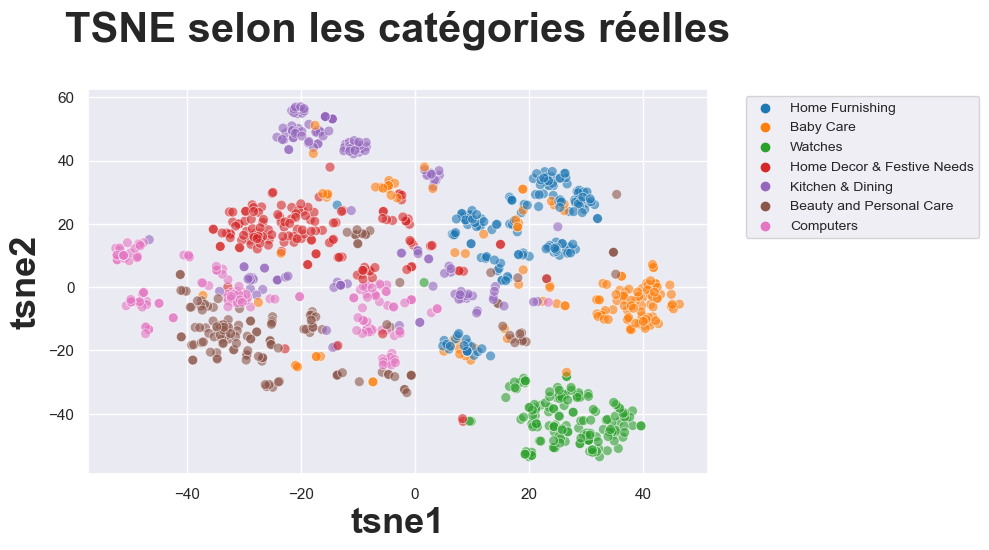

In [45]:
# affichage du TSNE en coloriant selon la catégorie réelle
plt.figure(figsize=(8,5))
sns.scatterplot(x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
                palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les catégories réelles', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 10})
plt.show();

#### Le graphique montre des catégories plus ou moins bien séparées mais on va vérifier l'aspect visuel avec un clustering Kmeans à partir des 2 composantes T-SNE

## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

In [46]:
# On choisit autant de clusters que de catégories
cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


/Users/juliesaubot/anaconda3/envs/tensorflow_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


###  Affichage des catégories selon clusters et calcul ARI de similarité catégories réelles / clusters

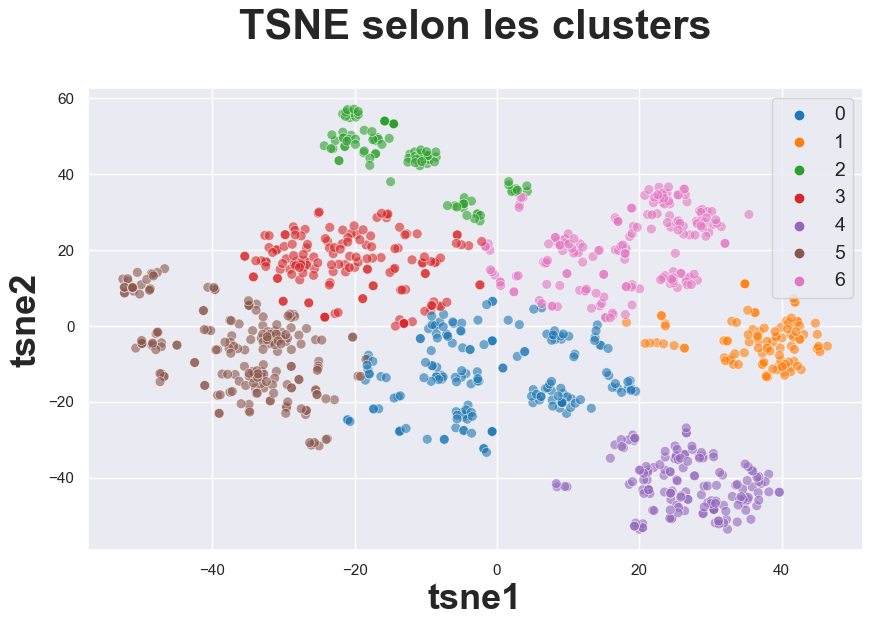

In [47]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="tsne1",
                y="tsne2",
                hue="cluster",
                palette=sns.color_palette('tab10', n_colors=7),
                s=50,
                alpha=0.6,
                data=df_tsne,
                legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14})

plt.show()

In [48]:
# On calcul le ARI score entre la catégorie réelle et le cluster Kmeans pour comparer la similarité de la catégorisation
labels = df['product_category']
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

# Le score est proche de 0.5 ce qui confirme le visuel et donc la faisabilité de classer automatiquement les produits

ARI :  0.49755077991333735


## Faisabilité de classification - Texte Embedding

In [49]:
# Fonctions que l'on va utiliser tout au long du projet

# Calcul de l'ARI Score
def ARI_fct(features) :
    time1 = time.time()
    num_labels=df['product_category'].nunique()
    labels = df['product_category']

    tsne = manifold.TSNE(n_components=2,
                         perplexity=30,
                         n_iter=2000,
                         init='random',
                         learning_rate=200,
                         random_state=42)
    X_tsne = tsne.fit_transform(features)
    df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
    df_tsne["class"] = df['product_category']


    # Détermination des clusters à partir des données après Tsne
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(labels, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)

    df_tsne["cluster"] = cls.labels_

    return ARI, df_tsne, cls.labels_

# visualisation du Tsne selon les catégories réelles et selon les clusters
def TSNE_visu_fct(df_tsne, labels_cls, ARI) :
    labels = df['product_category']
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
    plt.subplots_adjust(wspace = 1.3)

    sns.scatterplot(x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
                    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6, ax=ax1)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 14})
    ax1.set_xlabel('tsne1', fontsize = 26, fontweight = 'bold')
    ax1.set_ylabel('tsne2', fontsize = 26, fontweight = 'bold')
    ax1.set_title('TSNE selon les catégories réelles', fontsize = 20, pad = 35, fontweight = 'bold')

    sns.scatterplot(x="tsne1", y="tsne2",hue="cluster",
                    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
                    data=df_tsne,legend="brief", ax = ax2)
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left',prop={'size': 14})
    ax2.set_xlabel('tsne1', fontsize = 26, fontweight = 'bold')
    ax2.set_ylabel('tsne2', fontsize = 26, fontweight = 'bold')
    ax2.set_title('TSNE selon les clusters', fontsize = 20, pad = 35, fontweight = 'bold')

    plt.show()
    print("ARI : ", ARI)

### Creation de features à l'aide des 3 techniques de sentence embedding (Word2Vec, BERT et USE (Universal Sentence Encoder))
Le word embedding (plongement lexical) est une méthode d'encodage qui vise à représenter les mots ou les phrases d'un texte par des vecteurs de nombres réels, décrit dans un modèle vectoriel.
Les représentations vectorielles peuvent ensuite être utilisées dans des modèles d'apprentissage en profondeur.


Le modèle Word2vec est indépendant du contexte donc les mots à plusieurs sens sont representés par un seul vecteur. Il ne prends pas en compte la position du mot. L'embedding est disponible sous forme de paires clé-valeur donc nous n'avons pas besoin d'avoir le modèle lui même. L'entrée du modèle est un seul mot et la sortie est une representation vectorielle de ce mot. Word2Vec ne prend pas en charge les mots hors du vocabulaire.
Word2Vec est un simple réseau neuronal à une seule couche qui est formé en utilisant des ngrammes de chaque mot unique comme points de données de formation.


Cependant, le modèle BERT génère des intégrations qui nous permettent d'avoir plusieurs représentations vectorielles pour le même mot, en fonction du contexte dans lequel le mot est utilisé. Il prend en entrée la position (l'index) de chaque mot dans la phrase avant de réaliser l'embedding. Nous devons avoir le modèle formé avec nous afin de générer les intégrations en fonction de notre entrée et de notre contexte. En sortie, nous obtenons une représentation vectorielle de longueur fixe pour l’intégralité de la phrase d’entrée. Le modèle peut générer une représentation vectorielle pour n'importe quel mot arbitraire et n'est pas limité à l'espace du vocabulaire.
BERT est un modèle de réseau neuronal profond à 12 couches formé pour comprendre le langage en utilisant un entrainement auto-supervisée. 

#### Création du modèle Word2Vec

Word2Vec de la librairie gensim permet de visualiser l'embedding.

In [50]:
# Preparation des données

print("longueur max de mots dans la description:",df['description cleaned'].str.split("\\s+").map(lambda x: len(x)).max())
maxlen = 329 #depends de la longueur max des descriptions

# il faut que nos données soient sous forme de tokens (chaque mot séparé) et non de phrase
sentences = df['description cleaned'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]


longueur max de mots dans la description: 329


In [51]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=1, #Le nombre minimum de mots à prendre en compte lors de l’apprentissage du modèle ; les mots dont l’occurrence est inférieure à ce nombre seront ignorés. La valeur par défaut de min_count est 5.
                                   window=5, #La distance maximale entre un mot cible et les mots autour du mot cible. La fenêtre par défaut est de 5.
                                   vector_size=300, #La dimension du vecteur créé, idéalement inférieur au nombre de mots du vocabulaire
                                   seed=42, #
                                   workers=1) #Le nombre de lots créés pour l’entraînement, par défaut il y en a 3
                                  #workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=100)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 3066
Word2Vec trained


In [52]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post')

num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 3067


In [53]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0

for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]

word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (3067, 300)


In [54]:
# Création du modèle
input = Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input = Input(shape=(maxlen,),dtype='float64')
word_embedding = Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 329)]             0         
                                                                 
 embedding (Embedding)       (None, 329, 300)          920100    
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 920,100
Trainable params: 920,100
Non-trainable params: 0
_________________________________________________________________


In [55]:
#execution du modèle
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 1ms/step


2023-10-07 17:45:08.434511: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


(1050, 300)

#### Analyse graphique T-SNE et calcul de l'ARI score pour comparer les résultats avec les techniques plus simples de CountVectorizer et Tf-idf

In [56]:
#calcul de l'ARI Score
ARI, X_tsne, labels_cls = ARI_fct(embeddings)
scores = pd.concat([scores, pd.DataFrame({'modèle':'Word2Vec','ARI Score': ARI}, index = [0])]).reset_index(drop=True)


ARI :  0.32 time :  9.0


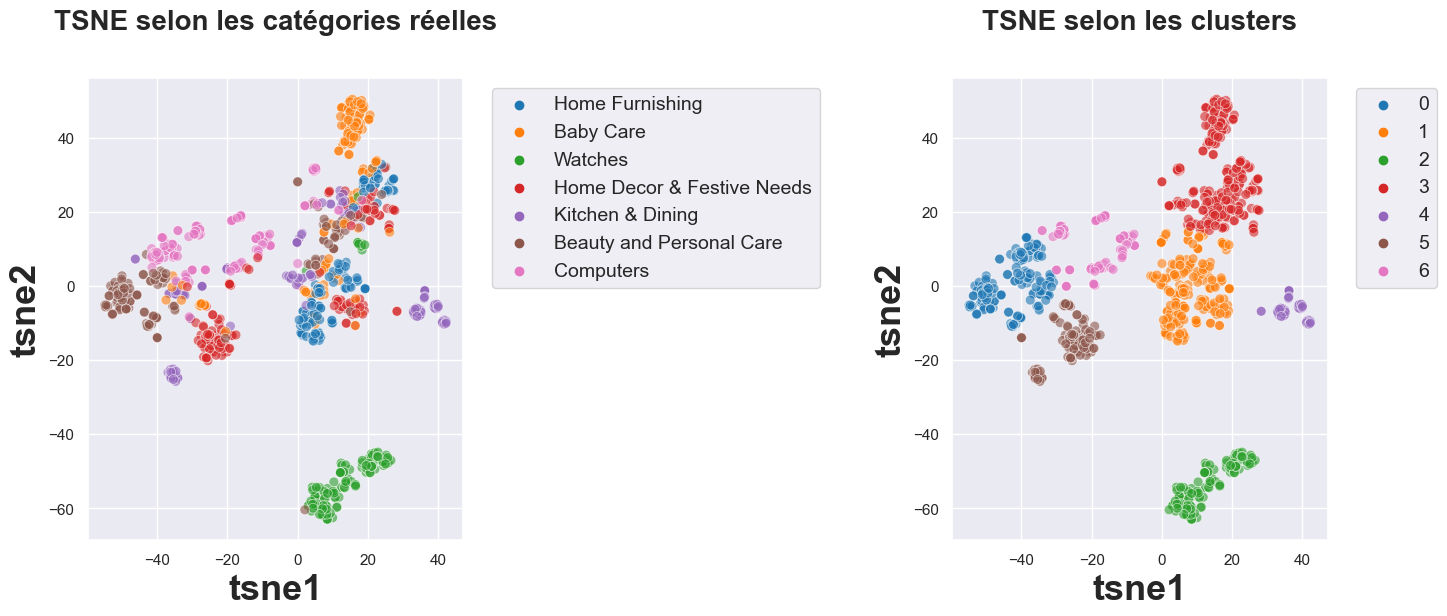

ARI :  0.32


In [57]:
TSNE_visu_fct(X_tsne, labels_cls, ARI)

## Creation du modèle BERT (Bidirectional Encoder Representations from Transformers)

La famille de modèles BERT utilise l'architecture de l'encodeur Transformer pour traiter chaque jeton de texte d'entrée dans le contexte complet de tous les jetons avant et après, d'où le nom : Représentations d'encodeur bidirectionnel de Transformers.

Les modèles BERT sont généralement pré-formés sur un grand corpus de texte, puis affinés pour des tâches spécifiques.


https://huggingface.co/docs/transformers/v4.33.0/en/internal/tokenization_utils#transformers.PreTrainedTokenizerBase.from_pretrained

In [58]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent, # The first sequence to be encoded
                                              add_special_tokens = True, # Whether or not to encode the sequences with the special tokens relative to their model
                                              max_length = max_length, #Pad to a maximum length specified with the argument max_length or to the maximum acceptable input length for the model if that argument is not provided.
                                              padding='max_length', #Pad to the longest sequence in the batch :
                                              return_attention_mask = True,  #Whether to return the attention mask (attention_mask — List of indices specifying which tokens should be attended to by the model)
                                              return_token_type_ids=True, #Whether to return token type IDs. If left to the default, will return the token type IDs according to the specific tokenizer’s default, defined by the return_outputs attribute.
                                              truncation=True, #Truncate to a maximum length specified with the argument max_length.This will truncate token by token, removing a token from the longest sequence in the pair if a pair of sequences (or a batch of pairs) is provided.
                                              return_tensors="tf") #will return tensors instead of list of python integers.'tf': Return TensorFlow tf.constant objects.

        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0],
                             bert_inp['token_type_ids'][0],
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)

    return input_ids, token_type_ids, attention_mask, bert_inp_tot

In [59]:
# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = transformers.AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size],
                                                                      bert_tokenizer, max_length)

        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids,
                                 "input_mask" : attention_mask,
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']

        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))

    features_bert = np.array(last_hidden_states_tot).mean(axis=1)

    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)

    return features_bert, last_hidden_states_tot

### BERT HuggingFace

In [60]:
#comment fixer max_length ?
df.describe()

retail_price  discounted_price
count    1049.000000       1049.000000
mean     2186.197331       1584.527169
std      7639.229411       7475.099680
min        35.000000         35.000000
25%       555.000000        340.000000
50%       999.000000        600.000000
75%      1999.000000       1199.000000
max    201000.000000     201000.000000

In [61]:
# BERT HuggingFace
max_length = 64
batch_size = 10
# On essaie le modele "bert-base-uncased" :
model_type = 'bert-base-uncased'
model = transformers.TFAutoModel.from_pretrained(model_type)
sentences = df['description cleaned DL'].to_list()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [62]:
# Création des features
features_bert, last_hidden_states_tot = feature_BERT_fct(model,
                                                         model_type,
                                                         sentences,
                                                         max_length,
                                                         batch_size,
                                                         mode='HF')

1/1 [==============================] - 0s 368ms/step
temps traitement :  45.0


In [63]:
features_bert.shape

(1050, 768)

In [64]:
# Calcul de l'ARI Score
ARI, X_tsne, labels_cls = ARI_fct(features_bert)
scores = pd.concat([scores, pd.DataFrame({'modèle':'BERT Hugging Face','ARI Score': ARI}, index = [0])]).reset_index(drop=True)



ARI :  0.3226 time :  10.0


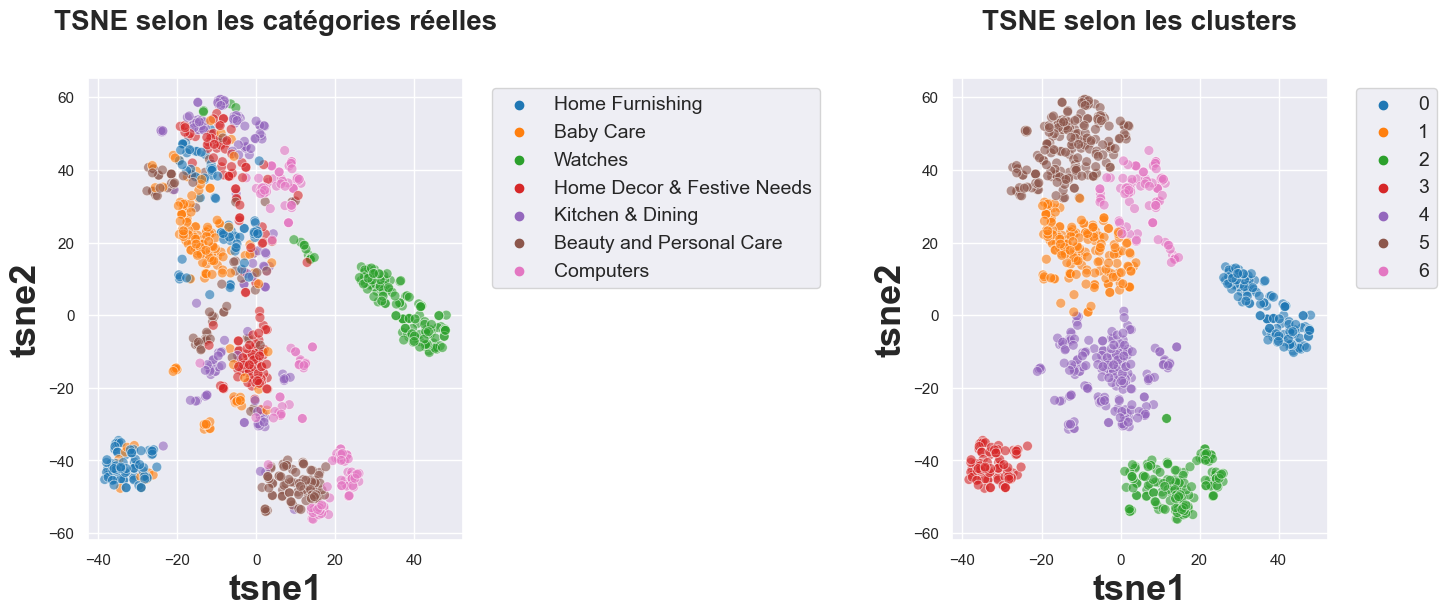

ARI :  0.3226


In [65]:
# Analyse graphique T-SNE
TSNE_visu_fct(X_tsne, labels_cls, ARI)

### Bert Hub TensorFlow

#### Essai 1 avec preprocess 

In [66]:
model = hub.load("bert_en_uncased_L-12_H-768_A-12_4 2")

In [67]:
bert_layer = hub.KerasLayer(model, trainable=True)

In [68]:
#model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
#bert_layer = hub.KerasLayer(model_url, trainable=True)

In [69]:
sentences = df['description cleaned DL'].to_list()

In [70]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences,
                                                         max_length, batch_size, mode='TFhub')

temps traitement :  45.0


In [71]:
features_bert.shape

(1050, 768)

In [72]:
# Calcul de l'ARI Score
ARI, X_tsne, labels_cls = ARI_fct(features_bert)
scores = pd.concat([scores, pd.DataFrame({'modèle':'BERT TensorFlow','ARI Score': ARI}, index = [0])]).reset_index(drop=True)

ARI :  0.3273 time :  9.0


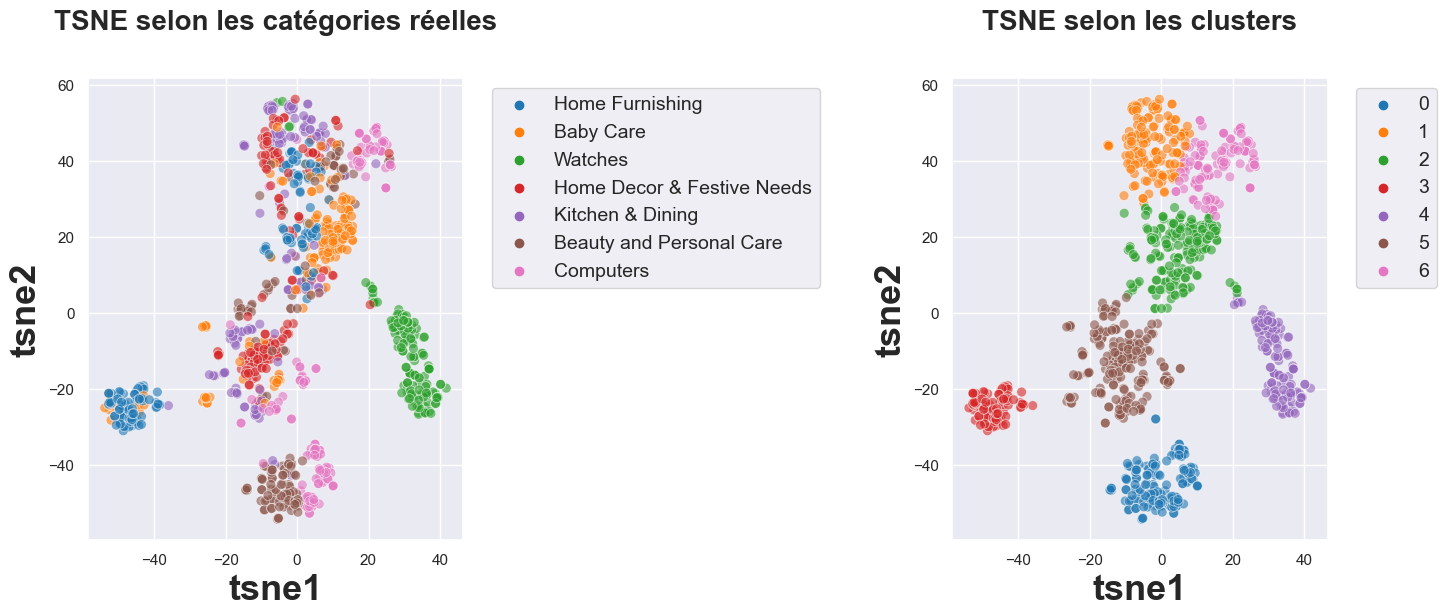

ARI :  0.3273


In [73]:
# Analyse graphique T-SNE
TSNE_visu_fct(X_tsne, labels_cls, ARI)

## Creation du modèle USE (Universal Sentence Encoder)

L’idée est de concevoir un encodeur qui résume n’importe quelle phrase donnée en une intégration de phrase de 512 dimensions. 

In [74]:
embed = hub.load("universal-sentence-encoder_4")
#embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [75]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [76]:
batch_size = 10
sentences = df['description cleaned DL'].to_list()

In [77]:
features_USE = feature_USE_fct(sentences, batch_size)

In [78]:
features_USE.shape

(1050, 512)

In [79]:
#Calcul de l'ARI Score
ARI, X_tsne, labels_cls = ARI_fct(features_USE)
scores = pd.concat([scores, pd.DataFrame({'modèle':'USE','ARI Score': ARI}, index = [0])]).reset_index(drop=True)

ARI :  0.4321 time :  10.0


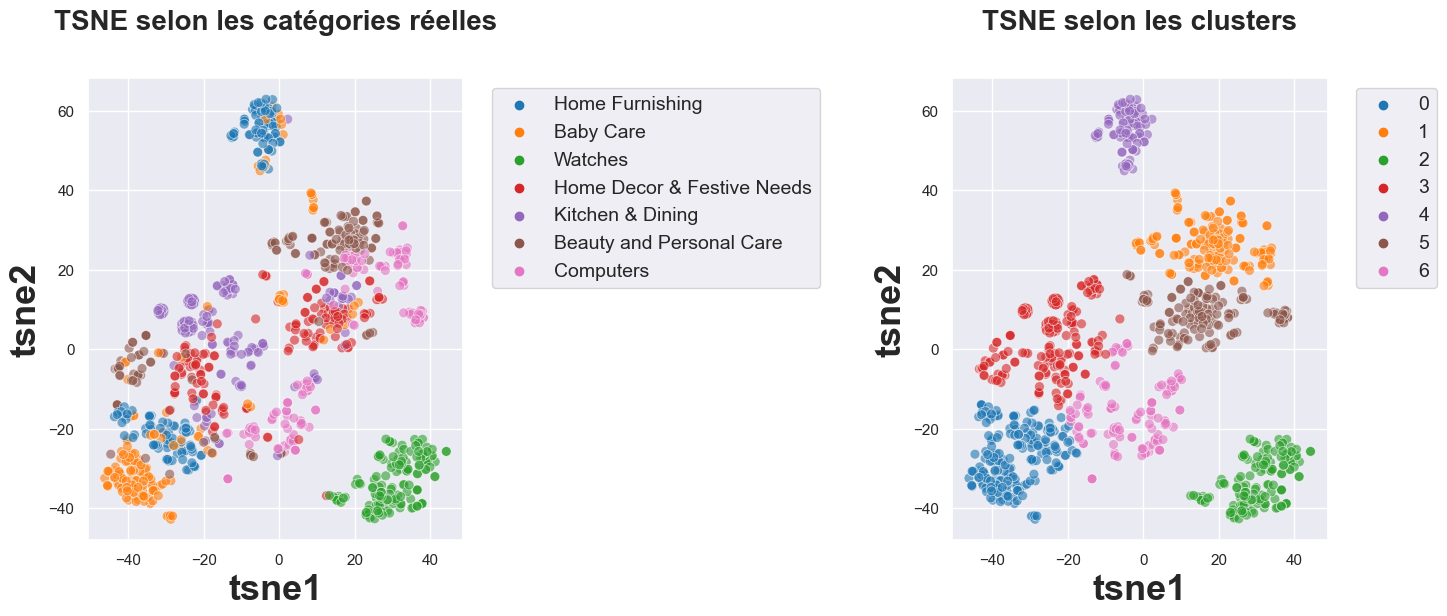

ARI :  0.4321


In [80]:
# Representation graphique
TSNE_visu_fct(X_tsne, labels_cls, ARI)

Conclusion sur les résultats des différentes techniques de Text Embedding :     
- Word2Vec
- BERT
- USE

In [81]:
scores

modèle  ARI Score
0  CountVectorizer 1     0.4161
1           Tf-idf 1     0.3931
2  CountVectorizer 2     0.4880
3           Tf-idf 2     0.5026
4  CountVectorizer 3     0.4962
5           Tf-idf 3     0.4114
6           Word2Vec     0.3200
7  BERT Hugging Face     0.3226
8    BERT TensorFlow     0.3273
9                USE     0.4321

# Faisabilité de classification automatique d'images via SIFT
Objectif : classifier automatiquement les images via une representation 2D des images et une verification d'une separation automatique selon leur catégorie réelle.

L'algorithme SIFT se divise en plusieurs étapes :

- Détection : création de l'espace des échelles, calcul des "DoG", localisation des points d'intérêt
- Description : assignation d'orientation, création des descripteurs


In [82]:
# On regarde les images
path = 'Flipkart 2/Images/'
X = []
for p in os.listdir(path):
    X.append(plt.imread(path + p))
X = np.array(X, dtype=object)
print("Shape of X:", X.shape)

/Users/juliesaubot/anaconda3/envs/tensorflow_env/lib/python3.8/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Shape of X: (1050,)


In [83]:
df.shape

(1050, 20)

In [84]:
list_photos = df['image'].tolist()
list_photos

['55b85ea15a1536d46b7190ad6fff8ce7.jpg',
 '7b72c92c2f6c40268628ec5f14c6d590.jpg',
 '64d5d4a258243731dc7bbb1eef49ad74.jpg',
 'd4684dcdc759dd9cdf41504698d737d8.jpg',
 '6325b6870c54cd47be6ebfbffa620ec7.jpg',
 '893aa5ed55f7cff2eccea7758d7a86bd.jpg',
 'f355cc1ccb08bd0d283ed979b7ee7515.jpg',
 'dd0e3470a7e6ed76fd69c2da27721041.jpg',
 '41384da51732c0b4df3de8f395714fbb.jpg',
 '710ed5f2393a4b9e8823aa0029f71f93.jpg',
 '920154acbe49d3202ed7d2ed2df1ea13.jpg',
 '08452abdadb3db1e686b94a9c52fc7b6.jpg',
 '1e8741b5ae27a513546c94b3f3312aee.jpg',
 '189fa66a5fa6f08d2802a62ecf0be298.jpg',
 'bbb8cdc5406ff60ff06ff64630f2ca47.jpg',
 '1120bc768623572513df956172ffefeb.jpg',
 '5479bb7028827d60000720a2c135976a.jpg',
 '733aa1e801a139fa8dc7be9f0eff5ee0.jpg',
 '62c35de4df27437d3597963fac55a8b6.jpg',
 '33d97d63c037078cd3f08033966d6a88.jpg',
 'd7ca2b06b4f4d3b98c61c377b18a2d6b.jpg',
 'f74476ba64365d97a5be7d375cbf4c7a.jpg',
 'fda50982a672ef8835de5c1cc86f8bfc.jpg',
 '4788f5466992da09024b8ffcc8a5cba4.jpg',
 '653826cd53f1d9

In [85]:
list_labels = df.product_category.unique().tolist()
list_labels

['Home Furnishing',
 'Baby Care',
 'Watches',
 'Home Decor & Festive Needs',
 'Kitchen & Dining',
 'Beauty and Personal Care',
 'Computers']

Home Furnishing


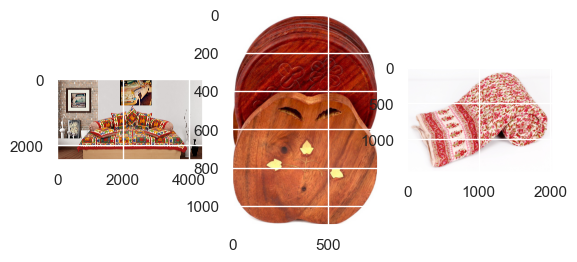

Baby Care


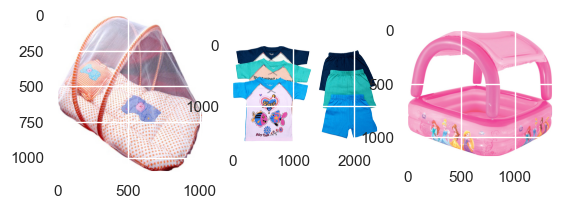

Watches


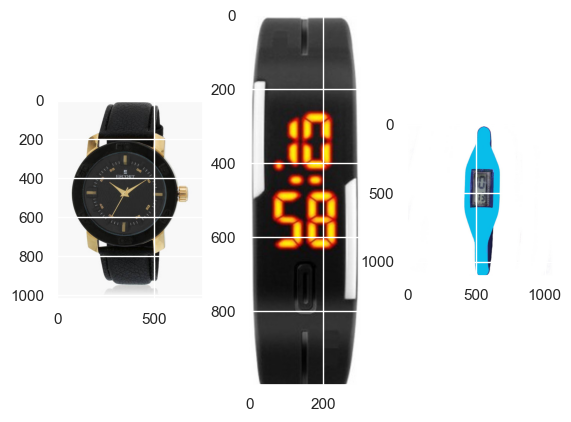

Home Decor & Festive Needs


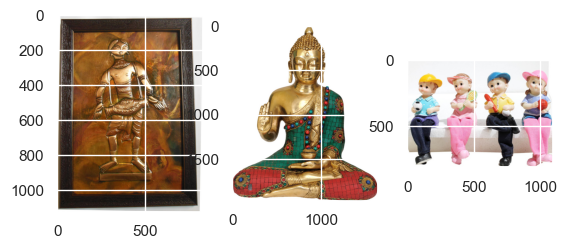

Kitchen & Dining


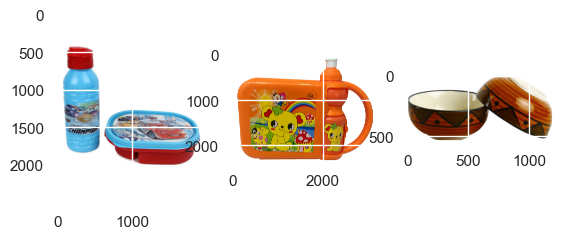

Beauty and Personal Care


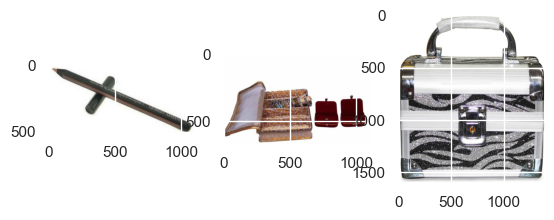

Computers


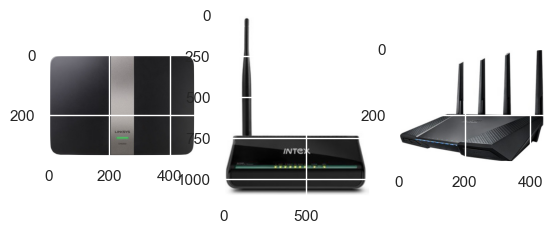

['0a8a1e9c6659361c0c2b247f8a6471d0.jpg', '04f9ff160a1561e3656350f4bd6b8c50.jpg', 'dfbd96036cbc28566e964cff04b5b3a8.jpg', '601817defaff9d0e30e1b72f96d3975f.jpg', '3cdfd9df09f61a8fd178bafcc8dbed31.jpg', '184ecf07ca4e2872eaf53d2344a1e783.jpg', '1120bc768623572513df956172ffefeb.jpg', '5479bb7028827d60000720a2c135976a.jpg', '733aa1e801a139fa8dc7be9f0eff5ee0.jpg', '22296bfc1c79d9dc88eabbd01220ef0c.jpg', 'f4d4c2eec77732f56e47722d7a355f2b.jpg', 'f12a06b7dbfc55638afafcf8bb03d836.jpg', 'ed9817e8960a6a0d509061c54cfe5ac1.jpg', '5a7a1287fef0d986a5e237797beee286.jpg', '9ba898ecb77ab5a6799c8b047c6b6008.jpg', '4942e0a9c0527dc00319a39fc8f103e6.jpg', '5749bae8ccead7997ebf370b6b081d07.jpg', '059493eeb88ebb4cc08d1522f3f87c3f.jpg', '64b463dc0b75ae40a848498c657041e6.jpg', 'c20bf28cd809790c04e78fdaf47c038f.jpg', 'fd2716d0e5dd7ffc367ca4dd9f97aaa0.jpg']


In [86]:
# Fonction qui crée une liste de noms d'images en fonction de la catégorie de produit 
def list_fct(name) :
    list_image_name = df.loc[df['product_category'] == name]['image'].tolist()
    return list_image_name

# On veut afficher 3 images par catégories de produits
list_ech_photos = []
for name in list_labels :
    print(name)
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = path + list_fct(name)[i+10]
        list_ech_photos.append(list_fct(name)[i+10])
        image = imread(filename)
        plt.imshow(image)
    plt.show()
print(list_ech_photos)

### Analyse d'une image et différentes approches de transformation :
- niveaux de gris : fonction autocontrast du modèle ImageOps de Pillow
- equalization
- filtrage bruit : fonction PIL.Image.filter
- contraste : fonction PIL.ImageOps.equalize
- floutage :

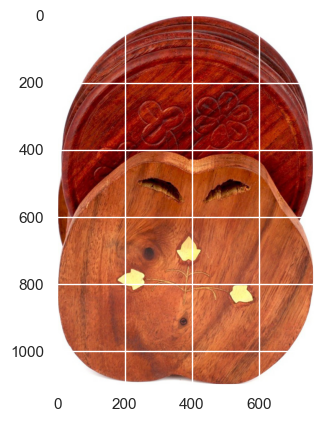

In [87]:
# Charger une image
img = Image.open(path+list_ech_photos[1])

# Afficher l'image chargée
plt.imshow(img);

In [88]:
# Récupérer et afficher la taille de l'image (en pixels)
w, h = img.size
print("Largeur : {} px, hauteur : {} px".format(w, h))

Largeur : 763 px, hauteur : 1100 px


In [89]:
# Afficher son mode de quantification
print("Format des pixels : {}".format(img.mode))

# Récupérer et afficher la valeur du pixel à une position précise
px_value = img.getpixel((20,100))
print("Valeur du pixel situé en (20,100) : {}".format(px_value))

Format des pixels : RGB
Valeur du pixel situé en (20,100) : (255, 255, 255)


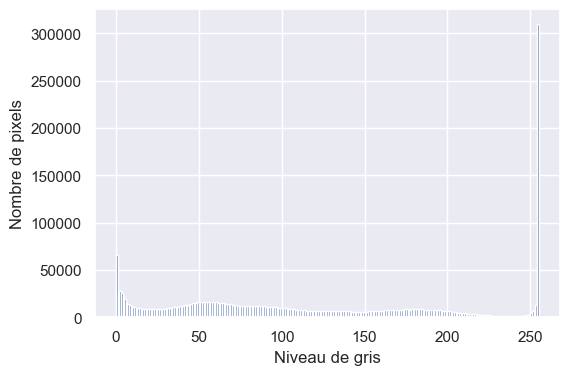

In [90]:
def graph_niveau_de_gris(img): 
    # Charger l'image comme matrice de pixels
    img_array = np.array(img)

    # Générer et afficher l'histogramme
    # Pour le normaliser : argument density=True dans plt.hist
    # Pour avoir l'histogramme cumulé : argument cumulative=True
    plt.figure(figsize=(6,4))
    n, bins, patches = plt.hist(img_array.flatten(), bins=range(256))
    plt.xlabel('Niveau de gris')
    plt.ylabel('Nombre de pixels')
    plt.show()
    
graph_niveau_de_gris(img)

In [91]:
image = cv2.imread(path+list_ech_photos[1],0)
image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


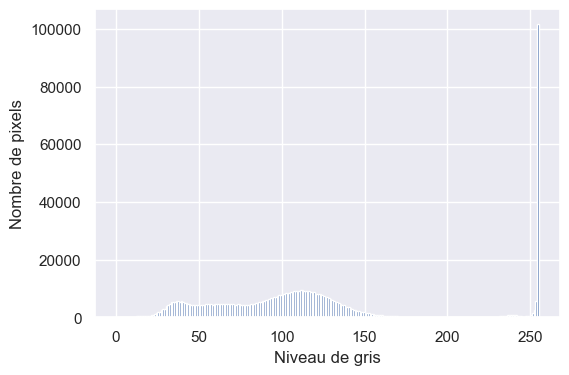

In [92]:
#passage en gris

image = Image.open(path+list_ech_photos[1])
image_grey = image.convert('L')

image_grey.show()

graph_niveau_de_gris(image_grey)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


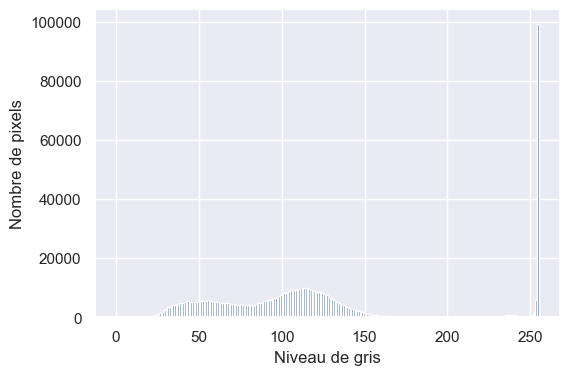

In [93]:
#filtrage du bruit : débruitage ou lissage

img_filter = image_grey.filter(ImageFilter.BLUR) 
img_filter.show()

graph_niveau_de_gris(img_filter)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


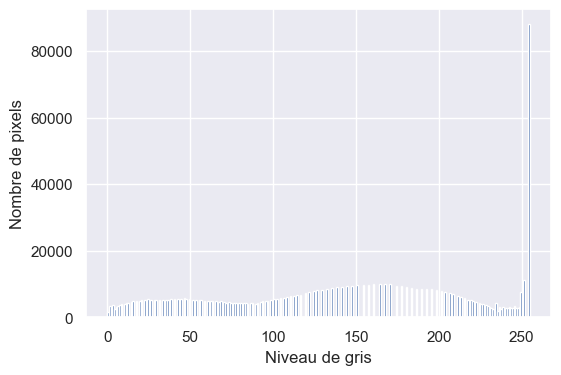

In [94]:
# égalisation
from PIL import ImageOps

img_equalize =  ImageOps.equalize(img_filter)
img_equalize.show()

graph_niveau_de_gris(img_equalize)

[ WARN:0@531.981] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/opencv_contrib-4.6.0/modules/xfeatures2d/misc/python/shadow_sift.hpp (15) SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


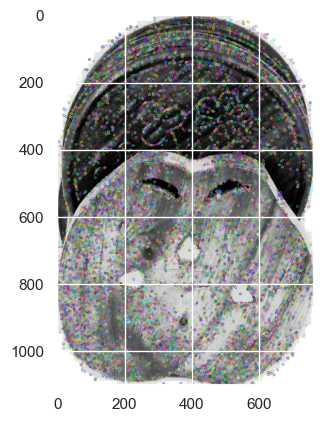

Descripteurs :  (10507, 128)

[[ 62.   2.   0. ...   0.   1.   2.]
 [  2.   0.   1. ...   0.   0.   2.]
 [ 62. 122.  11. ...  19.   6.  12.]
 ...
 [  8.  15.  30. ...   3.   0.   0.]
 [  6.  11.  36. ...   0.   0.   6.]
 [ 10.   0.   0. ...   0.   0.   1.]]


In [95]:
#Determination et affichage des descripteurs SIFT pour une image
sift = cv2.xfeatures2d.SIFT_create()
image = cv2.imread(path+list_ech_photos[1],0) 
# converting an image to grayscale

# equalize image histogram
image = cv2.equalizeHist(image)   
#Detects keypoints and computes their descriptors
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

# l'image contient 10 507 descripteurs
# chaque descripteur est un vecteur de longueur 128

### Extraction des descripteurs
Un descripteur est un vecteur qui décrit le voisinage de la feature à laquelle il est associé. Il est utilisé pour repérer les paires de features qui se ressemblent le plus dans deux images

In [96]:
# identification of key points and associated descriptors
sift_keypoints = []
temps1=time.time()
sift = cv2.xfeatures2d.SIFT_create(500)

for image_num in range(len(list_photos)) :
    #imprimer les nombre d'image quand c'est un multiple de 100
    if image_num%100 == 0 :
        print(image_num)
        
    #read image
    image = cv2.imread(path+list_photos[image_num],0)
    
    # convert in gray
    #image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #image = cv2.imread(image,cv2.IMREAD_GRAYSCALE)
    
    # equalize image histogram
    res = cv2.equalizeHist(image)
    
    #Detects keypoints and computes their descriptors
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

# creation d'une liste de descripteurs par image qui sera utilisée pour réaliser les histogrammes par image
sift_keypoints_by_img = np.asarray(sift_keypoints)
# création d'une liste de descripteurs pour l'ensemble des images qui sera utilisé pour créer les clusters de descripteurs
sift_keypoints_all = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000

Nombre de descripteurs :  (517221, 128)
temps de traitement SIFT descriptor :           190.67 secondes


/var/folders/4c/q7brdcr51gv3dycr8qx1xz_40000gn/T/ipykernel_58651/531488817.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sift_keypoints_by_img = np.asarray(sift_keypoints)


In [97]:
np.sqrt(len(sift_keypoints_all))

719.1807839479584

In [98]:
# creation des clusters de descripteurs

# Determination du nombre de cluters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering avec MiniBatchKMeans pour obtenir des temps de traitement raisonnables
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

/Users/juliesaubot/anaconda3/envs/tensorflow_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Nombre de clusters estimés :  719
Création de 719 clusters de descripteurs ...
temps de traitement kmeans :             7.63 secondes


### Générer les features des images via un bag of virtual words

Pour chaque image :
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

In [99]:
# Creation of histograms (features)
temps1 = time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist

# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")


0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             2.92 secondes


### Reduction de dimension avec une ACP
La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)

L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [100]:
print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 719)
Dimensions dataset après réduction PCA :  (1050, 493)


### T-SNE pour réduire à 2 composantes les features et les afficher en coloriant selon la catégorie réelle

In [101]:
#Calcul de l'ARI Score
ARI, X_tsne, labels_cls = ARI_fct(feat_pca)
scores = pd.concat([scores, pd.DataFrame({'modèle':'SIFT','ARI Score': ARI}, index = [0])]).reset_index(drop=True)

ARI :  0.0494 time :  12.0


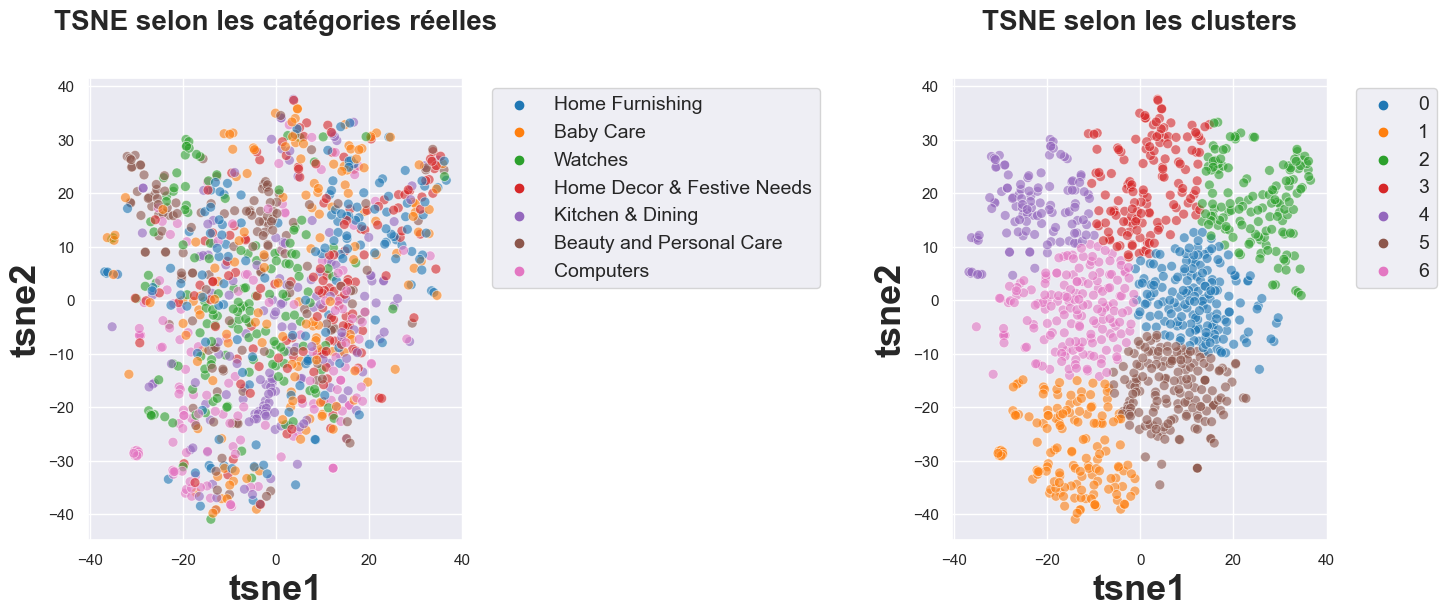

ARI :  0.0494


In [102]:
# Analyse graphique T-SNE
TSNE_visu_fct(X_tsne, labels_cls, ARI)

# C'est difficile de séparer les images selon le label donc le résultat n'est pas concluant avec SIFT
# ARI Score proche de 0 : cela confirme le visuel

# Faisabilité de classification automatique d'images via CNN Transfer Learning
Objectif : Vérifier la faisabilité de classifier automatiquement les images, simplement via une representation en 2D des images et une verification d'une séparation selon leur catégories réelle.

## Création du modèle pré-entraîné

Les modèles existants (VGG, ResNet, ...) sont composés de deux grandes parties. La première est un ensemble de convolution permettant l'extraction des features de l'image. La seconde est une succession de dense layer qui a pour but de classifier.

In [182]:
# On récupère un modèle pré-entraîné 
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [183]:
print(model.summary())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [105]:
# example of using the vgg16 model as a feature extraction model

# load an image from file
image = load_img(path+list_ech_photos[1], target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
# get extracted features
features = model.predict(image)
print(features.shape)

1/1 [==============================] - 0s 168ms/step
(1, 4096)


## Création des features des images

In [106]:
images_features = []
i=0 
for image_file in list_photos:
    if i%100 == 0 : print(i)
    i +=1
    # load images from file
    image = load_img(path + image_file, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # expand the shape of the array
    #image = np.expand_dims(image, axis=0)
    # prepare the image for the VGG model
    image = preprocess_input(image)
    images_features.append(model.predict(image, verbose=0)[0]) # predict from pretrained model

images_features = np.asarray(images_features)
images_features.shape

0
100
200
300
400
500
600


/Users/juliesaubot/anaconda3/envs/tensorflow_env/lib/python3.8/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


700
800
900
1000


(1050, 4096)

### Reduction de dimension avec une ACP

In [107]:
print("Dimensions dataset avant réduction PCA : ", images_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(images_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 4096)
Dimensions dataset après réduction PCA :  (1050, 803)


In [108]:
print(pca.explained_variance_ratio_.cumsum())

[0.080309   0.14527151 0.1950783  0.23059303 0.2628083  0.2871341
 0.30975655 0.32878795 0.34666738 0.36275283 0.37714505 0.39023674
 0.40284824 0.41497052 0.42565084 0.4361444  0.44613123 0.45566478
 0.46495348 0.47404397 0.48236755 0.49064395 0.49855322 0.5062206
 0.5134217  0.52018327 0.52681553 0.53319854 0.5392662  0.5450603
 0.5506771  0.55616814 0.5614791  0.56652963 0.5715076  0.5763969
 0.5811764  0.5858942  0.5904668  0.5949514  0.59927154 0.6034607
 0.60749996 0.611476   0.61526066 0.6190114  0.62263393 0.6262258
 0.62969106 0.63304335 0.63633955 0.6396248  0.64279217 0.64587903
 0.6489051  0.65189403 0.65483844 0.6577111  0.660528   0.6632972
 0.66601384 0.66869867 0.67131805 0.673876   0.6764081  0.67888916
 0.681349   0.6837825  0.6861063  0.6884235  0.69071853 0.6929723
 0.6951799  0.6973661  0.6995274  0.701653   0.7037665  0.7058522
 0.7078898  0.7098891  0.71186554 0.71378505 0.71568686 0.717564
 0.7194392  0.7212938  0.7230703  0.72483724 0.7265805  0.72831863
 0.730

### T-SNE pour réduire à 2 composantes les features et les afficher en coloriant selon la catégorie réelle

In [109]:
#Calcul de l'ARI Score
ARI, df_tsne, labels_cls = ARI_fct(feat_pca)
scores = pd.concat([scores, pd.DataFrame({'modèle':'CNN','ARI Score': ARI}, index = [0])]).reset_index(drop=True)

ARI :  0.4824 time :  10.0


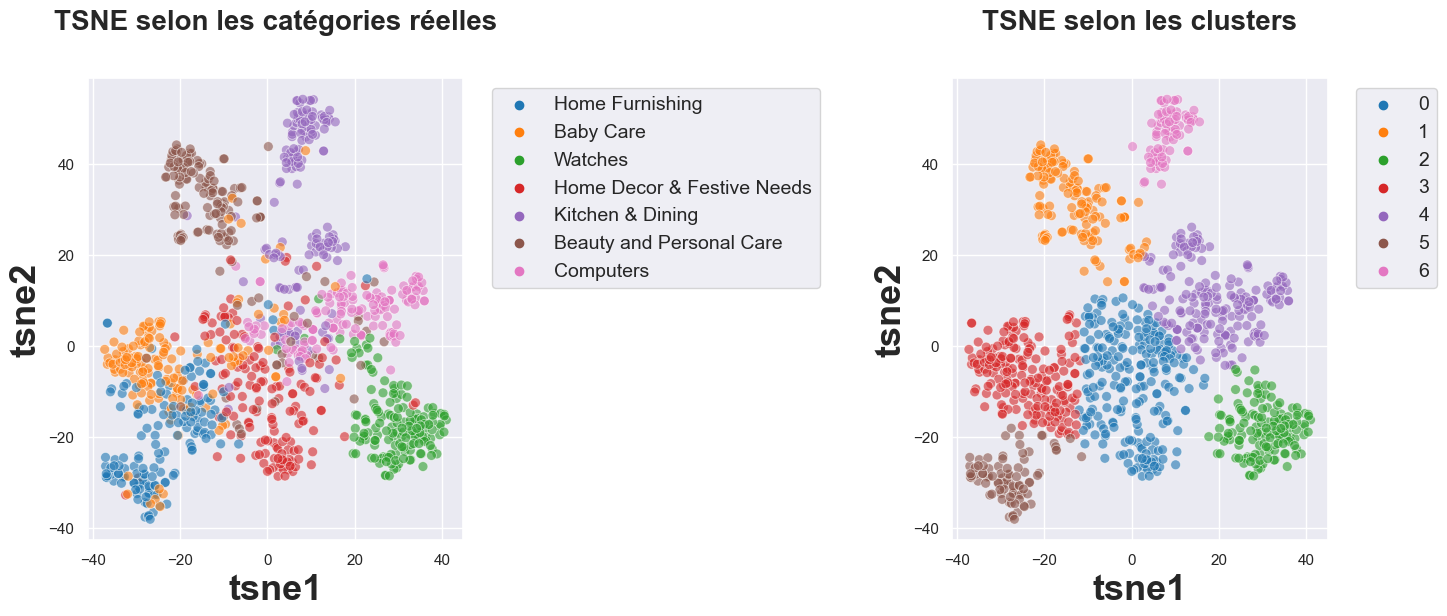

ARI :  0.4824


In [110]:
# Analyse graphique T-SNE
TSNE_visu_fct(df_tsne, labels_cls, ARI)

#Le résultat tant visuel que calculé (0.48) est bien plus pertinent 
#et montre, sans entraînement d’un modèle, la faisabilité de réaliser une classification automatique

In [157]:
# Analyse d'image "watches" affectées au cluster 4 

list_watches_0 = []
list_image = []
for i in range(len(df['image'])):
    if (df.iloc[i]['product_category']=='Kitchen & Dining') and (df_tsne.iloc[i]['cluster']==6):
        list_watches_0.append(i)
        list_image.append(df.iloc[i]['image'])
        
print(len(list_image))

78


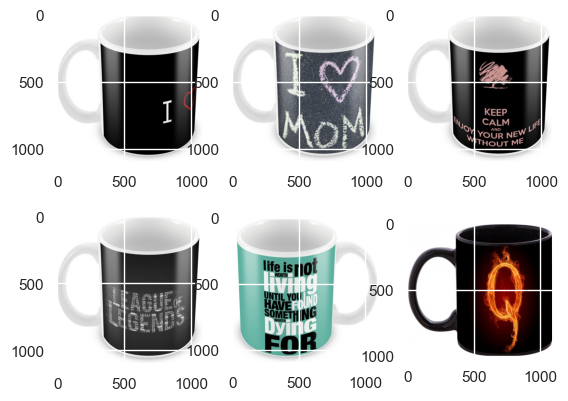

In [179]:
#on affiche les premieres images mal classées 
for i in range(6):
    plt.subplot(2,3,i+1)
    filename = path + list_image[i]
    image = imread(filename)
    plt.imshow(image)
plt.show()

In [125]:
# Les catégories par clusters
df_tsne.groupby('cluster')['class'].value_counts().to_frame()

count
cluster class                            
0       Home Decor & Festive Needs    126
        Computers                      29
        Baby Care                      25
        Kitchen & Dining               19
        Beauty and Personal Care       17
        Home Furnishing                 9
        Watches                         2
1       Beauty and Personal Care      117
        Kitchen & Dining               12
        Baby Care                       5
        Computers                       3
        Home Decor & Festive Needs      1
2       Watches                       135
        Home Decor & Festive Needs      3
        Beauty and Personal Care        1
        Computers                       1
3       Baby Care                     110
        Home Furnishing                66
        Home Decor & Festive Needs     10
        Beauty and Personal Care        3
        Computers                       1
4       Computers                     116
        Kitchen & Dining               41
        Watches                        13
        Beauty and Personal Care       10
        Home Decor & Festive Needs      8
        Baby Care                       1
        Home Furnishing                 1
5       Home Furnishing                74
        Baby Care                       8
        Home Decor & Festive Needs      2
        Beauty and Personal Care        1
6       Kitchen & Dining               78
        Baby Care                       1
        Beauty and Personal Care        1

### Analyse par classes

In [136]:
#on encode le la catégorie de produit
le = LabelEncoder()
le.fit(df["product_category"])
df_tsne["label"] = le.transform(df_tsne["class"])

In [151]:
df_tsne.head()

tsne1      tsne2            class  cluster  label
0 -32.993454 -28.881893  Home Furnishing        5      4
1 -20.369038 -19.691166        Baby Care        5      0
2 -22.531446 -14.445822        Baby Care        3      0
3 -24.573149 -24.945795  Home Furnishing        5      4
4 -23.414030 -30.080574  Home Furnishing        5      4

In [150]:
#on crée un dataframe des categories de produit
label_df = pd.DataFrame(list_labels, columns = ["category"])

# on encode les catégories 
label_df['label'] = LabelEncoder().fit_transform(label_df.category)
 
# on crée un cat-2-index dictionary
dict_df = label_df[['label','category']].copy()
dict_df.drop_duplicates(inplace=True)
dict_df.set_index('label',drop=True,inplace=True)
 
index_to_cat = dict_df.to_dict()['category']
index_to_cat

{4: 'Home Furnishing',
 0: 'Baby Care',
 6: 'Watches',
 3: 'Home Decor & Festive Needs',
 5: 'Kitchen & Dining',
 1: 'Beauty and Personal Care',
 2: 'Computers'}

In [152]:
index_to_cat[1]

'Beauty and Personal Care'

In [137]:
labels = df_tsne["label"]
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[ 21  92  13   5   1   2  16]
 [ 39   5   0  10   0  93   3]
 [ 60   1   0   0   0  89   0]
 [  7   1   6 118   2   2  14]
 [ 20   0   0   1   0   0 129]
 [ 26   2  82  19   0  10  11]
 [  1   0   0   0 149   0   0]]


In [138]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

In [139]:
cls_labels_transform = conf_mat_transform(labels, labels_cls)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [3 1 6 0 2 4 5]
[[110   5   1  25   8   1   0]
 [  3 117  10  17   1   1   1]
 [  1   3 116  29   0   0   1]
 [ 10   1   8 126   2   0   3]
 [ 66   0   1   9  74   0   0]
 [  0  12  41  19   0  78   0]
 [  0   0  13   2   0   0 135]]

              precision    recall  f1-score   support

           0       0.58      0.73      0.65       150
           1       0.85      0.78      0.81       150
           2       0.61      0.77      0.68       150
           3       0.56      0.84      0.67       150
           4       0.87      0.49      0.63       150
           5       0.97      0.52      0.68       150
           6       0.96      0.90      0.93       150

    accuracy                           0.72      1050
   macro avg       0.77      0.72      0.72      1050
weighted avg       0.77      0.72      0.72      1050



In [153]:
list_labels_sorted = []
for i in range(7):
    list_labels_sorted.append(index_to_cat[i])
list_labels_sorted

['Baby Care',
 'Beauty and Personal Care',
 'Computers',
 'Home Decor & Festive Needs',
 'Home Furnishing',
 'Kitchen & Dining',
 'Watches']

<Axes: >

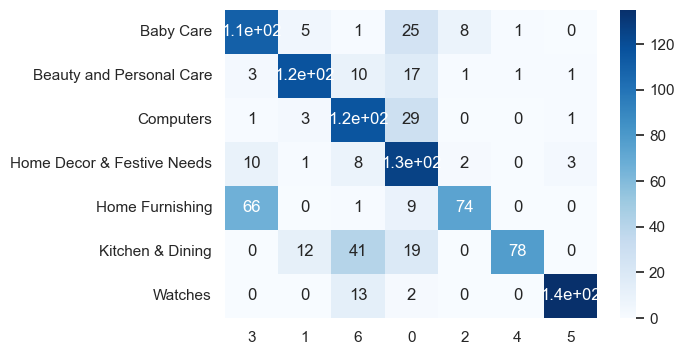

In [155]:
df_cm = pd.DataFrame(conf_mat, 
                     index = [label for label in list_labels_sorted],
                     columns = [i for i in "3160245"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

## Scores finaux

In [119]:
scores

modèle  ARI Score
0   CountVectorizer 1     0.4161
1            Tf-idf 1     0.3931
2   CountVectorizer 2     0.4880
3            Tf-idf 2     0.5026
4   CountVectorizer 3     0.4962
5            Tf-idf 3     0.4114
6            Word2Vec     0.3200
7   BERT Hugging Face     0.3226
8     BERT TensorFlow     0.3273
9                 USE     0.4321
10               SIFT     0.0494
11                CNN     0.4824

## Enregistrement du dataframe

In [120]:
df.to_csv("df.csv")